In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.stats import norm,multivariate_normal

import warnings

x = print()
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# from random import shuffle
from sklearn.utils import shuffle

from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import argparse
from sklearn.utils import shuffle
from ope_v3 import *
import matplotlib.pyplot as plt

In [2]:
def load_dataset(data):
    if data == 'opt':
        data = pd.read_csv('optdigits.csv', header=None)
        data = shuffle(data)
        label = np.array(data[64]) - 1
        xy = np.array(data.drop([64], axis=1))
        n_class = 10
        train_size_list = [500,1000,2000, int(len(xy) * 0.7)]

        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'satimage':
        data, labels = load_svmlight_file('satimage.scale')
        data = data.toarray()
        labels = np.array(labels, np.int64)
        index = np.random.permutation(len(data))
        xy = data[index]
        label = labels[index]
        label = label - 1
        n_class = max(label) + 1
        train_size_list = [500,1000,2000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]
    elif data == 'veh':
        data, labels = load_svmlight_file('vehicle.scale')
        data = data.toarray()
        labels = np.array(labels, np.int64)
        index = np.random.permutation(len(data))
        xy = data[index]
        label = labels[index]
        label = label - 1
        n_class = max(label) + 1
        print(n_class)
        train_size_list = [200, 500,  int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]


    elif data == 'pen':
        data = pd.read_csv('pendigits.tra', sep=',', header=None)
        data = shuffle(data)

        label = np.array(data[16])
        xy = np.array(data.drop([16], axis=1))
        xy = StandardScaler().fit(xy).transform(xy)
        n_class = 10
        train_size_list = [500, 1000, 2000,5000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'letter':
        data = pd.read_csv('letter.csv')
        data = shuffle(data)
        label = np.array(data['0'])
        xy = np.array(data.drop(['0'], axis=1))
        xy = StandardScaler().fit(xy).transform(xy)
        n_class = 26
        train_size_list = [5000,10000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'glass':
        data = pd.read_csv('glass.data', sep=',', header=None)
        data = shuffle(data)
        data = data.drop([0], axis=1)
        label = np.array(data[10] - 1, int)
        xy = np.array(data.drop([10], axis=1))
        label[label > 3] = (label[label > 3] - 1)
        xy = StandardScaler().fit(xy).transform(xy)
        n_class = 6

        train_size_list = [50, 100, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'ecoli':
        data = pd.read_csv('ecoli.data', header=None)
        label = data[7]
        xy = np.array(data.drop([7], axis=1))
        le = LabelEncoder()
        label = le.fit_transform(label)

        index = np.random.permutation(len(data))
        xy = xy[index]
        label = label[index]

        n_class = 8
        train_size_list = [50, 100, 200, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]


    elif data == 'yeast':
        data = pd.read_csv('yeast.data')
        y = data.iloc[:, -14:]
        label = np.zeros(len(y), int)
        for i in range(len(y.columns)):
            col = y.columns[i]
            label[y[col] == 1] = i

        xy = np.array(data.iloc[:, 0:-14])
        index = np.random.permutation(len(xy))

        xy = xy[index]
        label = label[index].reshape(len(label))
        n_class = 14
        train_size_list = [100, 200, 500, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]

    elif data == 'page':
        data = pd.read_csv('page-blocks.data', header=None)
        split_data = []
        for t in data[0]:
            split_data.append(t.split())
        data = np.array(split_data, float)
        label = np.array(data[:, -1] - 1, int)
        xy = data[:, :-1]

        index = np.random.permutation(len(xy))
        xy = xy[index]
        label = label[index]
        xy = StandardScaler().fit(xy).transform(xy)

        train_size_list = [50,100, 1000, 2000, int(len(xy) * 0.7)]
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]
        n_class = 5



    elif data == 'mnist':
        path = 'training.pt'
        features_, labels = torch.load(path)
        size = 28
        trans = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(size),
            transforms.ToTensor(),
            transforms.Normalize([0.5],[0.5])
        ])

        features = torch.zeros((len(features_), size, size))
        for i in range(len(features_)):
            features[i] = trans(features_[i].reshape(1,28,28))


        features = features.numpy().reshape(-1, size * size)[:30000]
        labels = labels.numpy()[:30000]

        xy = features
        label = labels
        n_class = 10
        train_size_list = [int(len(xy) * 0.7)]
        test_size_list = [int(len(xy) * 0.3)]
    return xy,label,n_class,train_size_list,test_size_list



In [64]:
xy, label, n_class,train_size_list,size_list = load_dataset('opt')


onehot_model = OneHotEncoder(sparse=False).fit(label.reshape((len(label), 1)))

n_dim = xy.shape[1]
train_xy = xy[:int(len(xy) * 0.7)]
test_xy = xy[int(len(xy) * 0.7):]

train_label = label[:int(len(xy) * 0.7)]
test_label = label[int(len(xy) * 0.7):]

pca_model = PCA(n_components=1).fit(xy)
fc = pca_model.transform(xy)

train_fc = fc[:int(len(xy) * 0.7)]
test_fc = fc[int(len(xy) * 0.7):]

train_size = int(len(xy) * 0.7)


In [65]:

# for a in [0.6,0.8,1.2,1.4]:
#     for b in [0.6,0.8,1.2,1.4]:

#         def get_distribution(fc,a,b,test = False):
#             m = np.min(fc)
#             m_bar = np.mean(fc)
#             mean = m + (m_bar-m)/a

#             # min + (mean - min)/0.8
#             # (mean - min) / 0.3
#             std = np.sqrt((m_bar - m)/b)
#             pdf = norm(loc = mean,scale = std).pdf(fc)
#             if test:
#                 pdf = np.ones((len(fc),1))
#                 return pdf / sum(pdf), 0, 1
#             return pdf, mean, std

#         pdf, mean,std = get_distribution(fc,a,b,test = False)


#         import math
#         def normal_distribution(x, mean, sigma):
#             return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)

#         mean1, sigma1 = mean, std
#         x1 = np.linspace(mean1 - 6*sigma1, mean1 + 6*sigma1, 100)
#         y1 = normal_distribution(x1, mean1, sigma1)
#         plt.plot(x1, y1, 'r', label='m=0,sig=1')
#         plt.hist(fc,bins = 100,density = True)
#         plt.title(str(a) +'_' +str(b))
#         plt.show()


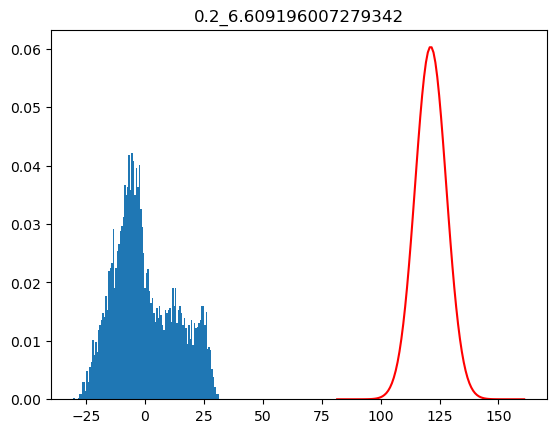

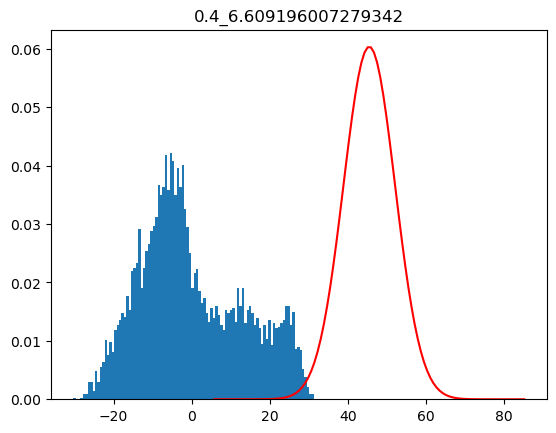

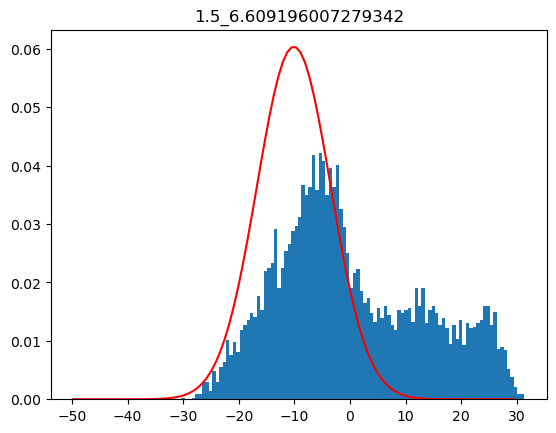

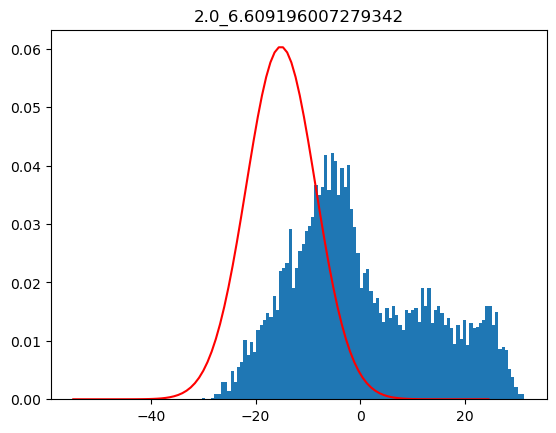

In [69]:
for a in [0.2,0.4,1.5,2.0]:

    for b in [1]:

        def get_distribution(fc,a,b,test = False):
            m = np.min(fc)
            m_bar = np.mean(fc)
            mean = m + (m_bar-m)/a
            std = np.sqrt((m_bar - m)/b)
            pdf = norm(loc = mean,scale = std).pdf(fc)
            if test:
                pdf = np.ones((len(fc),1))
                return pdf / sum(pdf), 0, 1
            return pdf, mean, std

        pdf, mean,std = get_distribution(fc,a,b,test = False)
        std = np.std(fc)/2
        import math
        def normal_distribution(x, mean, sigma):
            return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)

        mean1, sigma1 = mean, std
        x1 = np.linspace(mean1 - 6*sigma1, mean1 + 6*sigma1, 100)
        y1 = normal_distribution(x1, mean1, sigma1)
        plt.plot(x1, y1, 'r', label='m=0,sig=1')
        plt.hist(fc,bins = 100,density = True)
        plt.title(str(a) +'_' +str(std))
        plt.show()
